In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness/2019.csv
/kaggle/input/world-happiness/2018.csv
/kaggle/input/world-happiness/2016.csv
/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2015.csv


In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC

In [15]:
df = pd.read_csv("../input/world-happiness/2019.csv")

In [16]:
display(df)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


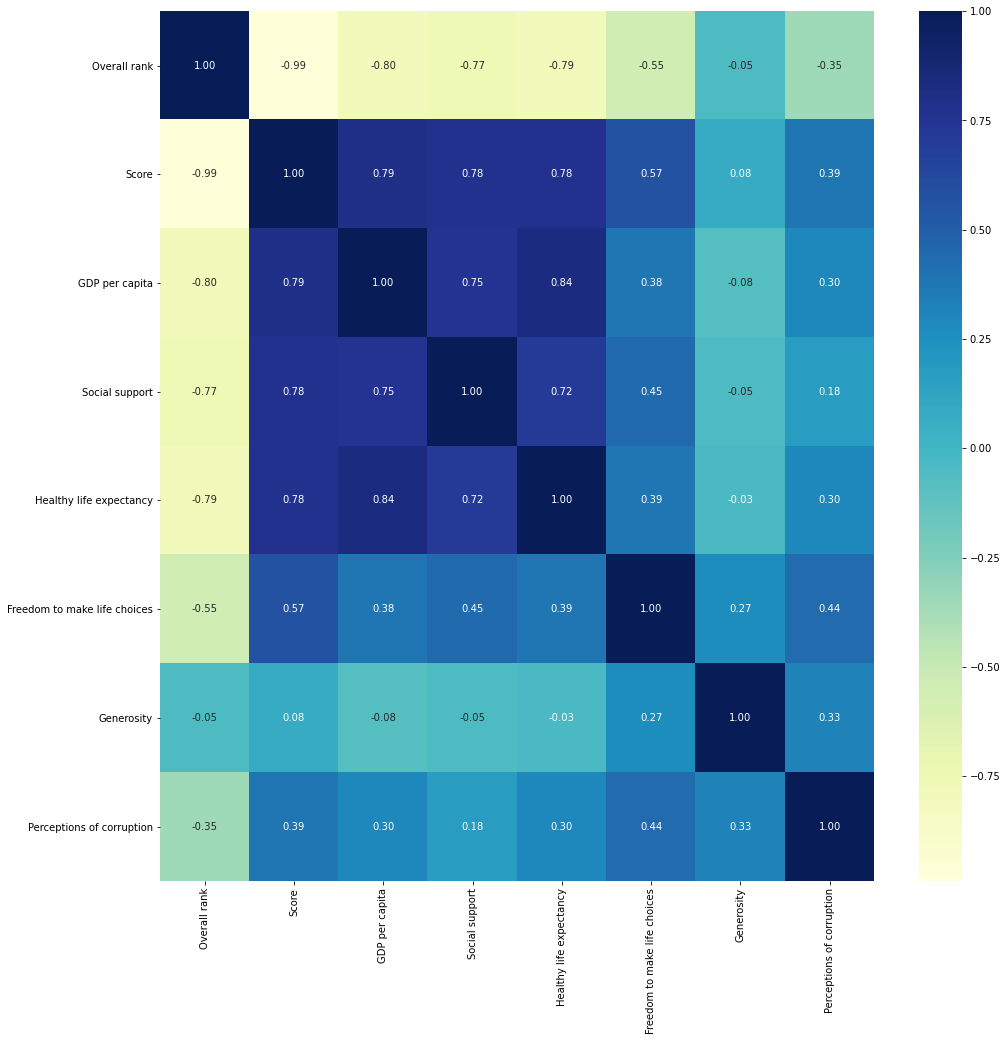

In [17]:
correlation = df.corr()
plt.figure(figsize=(16,16))
sns.heatmap(correlation,fmt=".2f",annot=True,cmap="YlGnBu")

In [18]:
null_value = df.isnull().sum()
print(null_value)

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


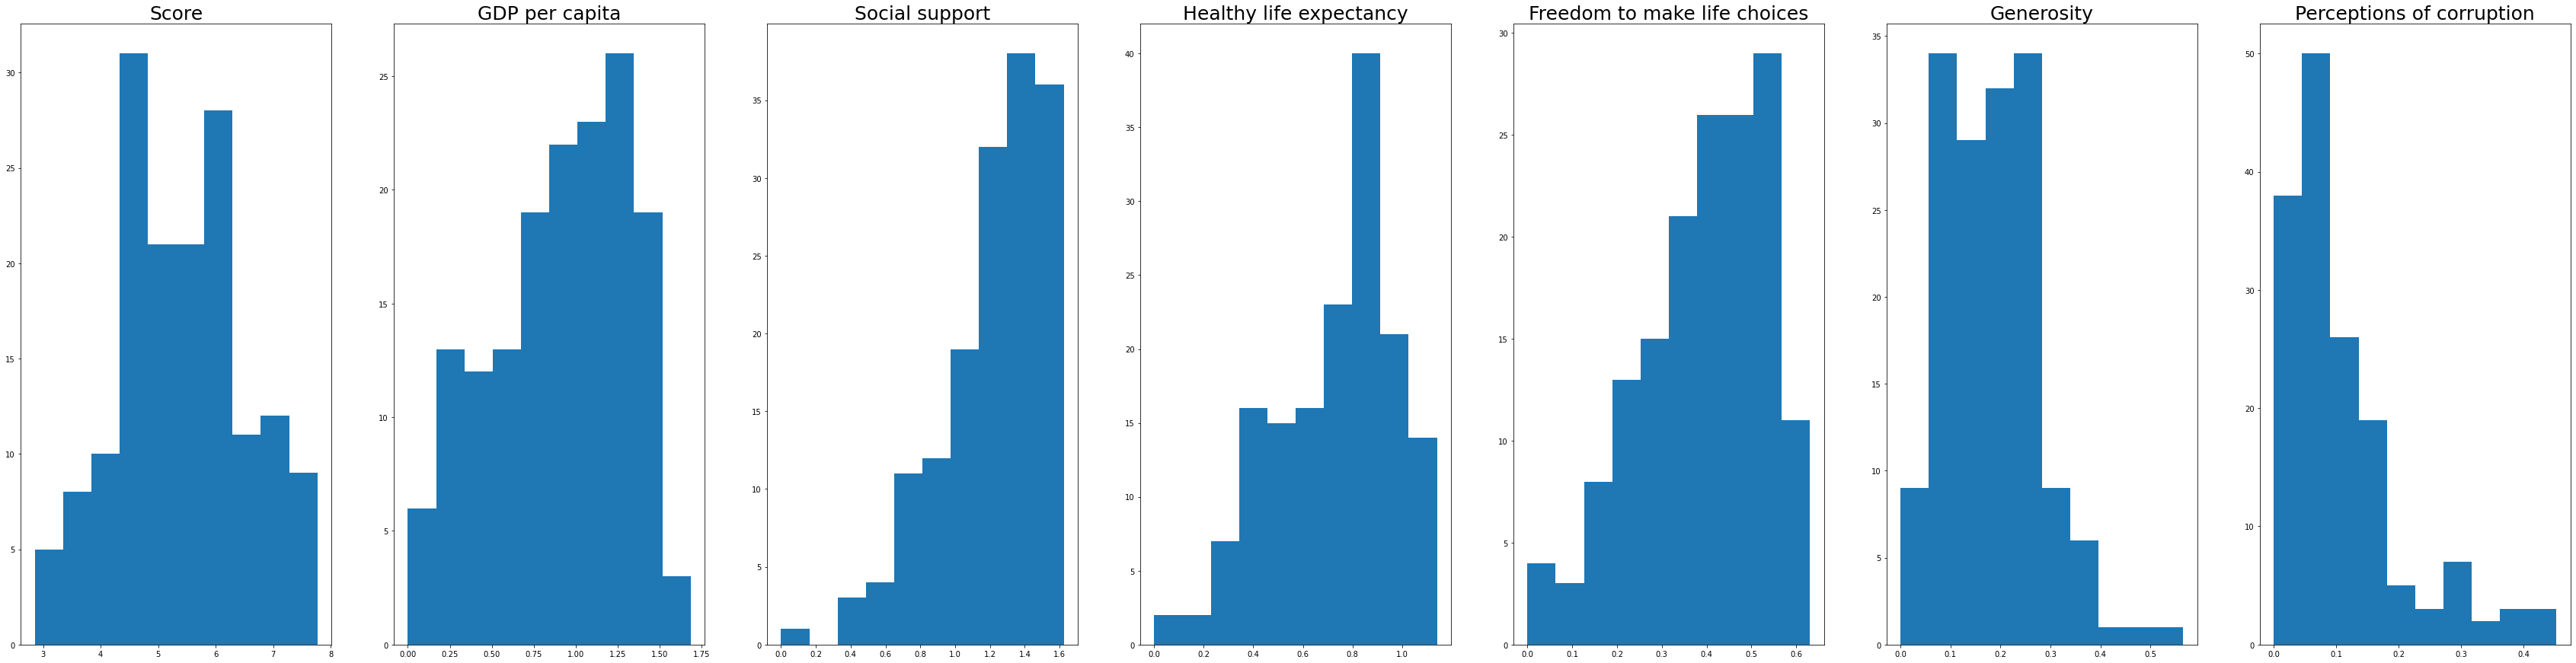

In [19]:
val = df.columns[2:].to_list()

plt.figure(figsize=(60,15))
for i in range(1,8):
    plt.subplot(1,7,i)
    plt.hist(df[val[i-1]])
    plt.title("{}".format(val[i-1]),fontsize=25)

In [24]:
df_log = df
df_log["Social support"] = np.log(df_log["Social support"] + 1)
df_log["Perceptions of corruption"] = np.log(df_log["Perceptions of corruption"] + 1)
display(df_log)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,0.668085,0.986,0.596,0.153,0.286276
1,2,Denmark,7.600,1.383,0.665299,0.996,0.592,0.252,0.295345
2,3,Norway,7.554,1.488,0.667093,1.028,0.603,0.271,0.257286
3,4,Iceland,7.494,1.380,0.675339,1.026,0.591,0.354,0.105748
4,5,Netherlands,7.488,1.396,0.654953,0.999,0.557,0.322,0.231766
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.429883,0.614,0.555,0.217,0.295872
152,153,Tanzania,3.231,0.476,0.490987,0.499,0.417,0.276,0.128525
153,154,Afghanistan,3.203,0.350,0.348355,0.361,0.000,0.158,0.024393
154,155,Central African Republic,3.083,0.026,0.000000,0.105,0.225,0.235,0.033823


In [71]:
X = df_log.iloc[:,3:]
y = df_log.Score
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8)

In [98]:
li_model = LinearRegression()
Ada_model = AdaBoostRegressor()


li_model.fit(X_train,y_train)
Ada_model.fit(X_train,y_train)


li_preds = li_model.predict(X_test)
Ada_preds = Ada_model.predict(X_test)

li_mse = mean_squared_error(y_test,li_preds)
Ada_mse = mean_squared_error(y_test,Ada_preds)

MSE = pd.DataFrame({
    "li_mse" : [li_mse],
    "Ada_mse" : [Ada_mse]
   
})
display(MSE)

,li_mse,Ada_mse
0,0.270874,0.321443


In [ ]:
### LinearRegression 선택, GridSearch 시행, feature_importance 